Dataset is downloaded from https://catalog.data.gov/dataset/global-landslide-catalog-export

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import plotly.express as px


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

Imported some required libraries in the above cell.

In [ ]:
gl=pd.read_csv("/content/Global_Landslide_Catalog_Export.csv")

I read the dataset using pandas and name dataframe as 'gl'

In [ ]:
gl.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


Displayed the first 5 rows using head function.

In [ ]:
gl.tail()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,11109,04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,10845,03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,10973,12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,10901,04/29/2017 07:03:00 PM,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,NaN,NaN,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395
11032,The Times of India,https://timesofindia.indiatimes.com/city/hyder...,10949,03/13/2017 02:32:00 PM,NaN,Kondapur Commercial Complex Construction Mudslide,A mudslide at an under-construction commercial...,"Hyderabad, Rangareddy, Telangana",1km,mudslide,...,NaN,NaN,NaN,NaN,NaN,10/05/2017 02:32:00 PM,12/08/2017 07:57:00 PM,02/15/2018 03:51:00 PM,78.356505,17.465630


same like head function, Tail is used to display last five rows of data.

In [ ]:
print('the no:of rows present in dataframe is:',gl.shape[0],'and columns are',gl.shape[1])

the no:of rows present in dataframe is: 11033 and columns are 31


Displayed shape of the dataframe 'gl'.

In [ ]:
gl.sample(4)

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
8028,www.wkyt.com,http://www.wkyt.com/wymt/home/headlines/Mudsli...,5709,12/22/2013 09:00:00 AM,NaN,"Mousie, Ky",Overnight winds and rainfall left a lot for ro...,"Mousie, Ky",5km,mudslide,...,US,Kentucky,777.0,Hindman,9.94567,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-82.9083,37.4046
1613,gmanetwork,http://www.gmanetwork.com/news/story/244447/ne...,4132,01/07/2012 12:00:00 AM,NaN,"Taclobo in San Fernando town, Romblon",Two landslides in Romblon were recorded last J...,"Taclobo in San Fernando town, Romblon",10km,landslide,...,PH,Mimaropa,4782.0,Taclobo,4.57998,09/12/2014 08:22:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,122.5600,12.3400
8309,CapeTimes,http://www.capetimes.co.za/?fArticleId=4109453,342,10/31/2007 12:00:00 AM,NaN,Tabascom,"unspecified location of events, reported affec...",Tabascom,unknown,landslide,...,MX,Tabasco,4468.0,Buenavista,4.19108,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-92.5534,17.9493
6066,Business Standard,http://www.business-standard.com/article/pti-s...,6024,05/14/2014 12:00:00 AM,NaN,Ramban,A couple died in a landslide that hit their ho...,Ramban,1km,landslide,...,IN,Kashmir,7317.0,Rāmban,0.19906,08/24/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,75.2405,33.2394


sample function is used to display random rows, Here I pass '4' as argument to display random 4 rows.

In [ ]:
gl.count()

source_name                  11033
source_link                  10187
event_id                     11033
event_date                   11033
event_time                       0
event_title                  11033
event_description            10171
location_description         10931
location_accuracy            11031
landslide_category           11032
landslide_trigger            11010
landslide_size               11024
landslide_setting            10964
fatality_count                9648
injury_count                  5359
storm_name                     577
photo_link                    1496
notes                          317
event_import_source           9470
event_import_id               9471
country_name                  9471
country_code                  9469
admin_division_name           9396
admin_division_population     9471
gazeteer_closest_point        9470
gazeteer_distance             9471
submitted_date               11023
created_date                 11032
last_edited_date    

count() used to count non-null values in each column of a DataFrame and it excludes null or missing values from the count.

In [ ]:
gl.columns

Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time',
       'event_title', 'event_description', 'location_description',
       'location_accuracy', 'landslide_category', 'landslide_trigger',
       'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count',
       'storm_name', 'photo_link', 'notes', 'event_import_source',
       'event_import_id', 'country_name', 'country_code',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date',
       'created_date', 'last_edited_date', 'longitude', 'latitude'],
      dtype='object')

To display only column names of dataframe we can use this above code.

In [ ]:
gl.dtypes

source_name                   object
source_link                   object
event_id                       int64
event_date                    object
event_time                   float64
event_title                   object
event_description             object
location_description          object
location_accuracy             object
landslide_category            object
landslide_trigger             object
landslide_size                object
landslide_setting             object
fatality_count               float64
injury_count                 float64
storm_name                    object
photo_link                    object
notes                         object
event_import_source           object
event_import_id              float64
country_name                  object
country_code                  object
admin_division_name           object
admin_division_population    float64
gazeteer_closest_point        object
gazeteer_distance            float64
submitted_date                object
c

dtypes will display each and every column datatype. Here, You can see that most of the column have strings or mixture of different data types represented by 'object'.

In [ ]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                11033 non-null  object 
 1   source_link                10187 non-null  object 
 2   event_id                   11033 non-null  int64  
 3   event_date                 11033 non-null  object 
 4   event_time                 0 non-null      float64
 5   event_title                11033 non-null  object 
 6   event_description          10171 non-null  object 
 7   location_description       10931 non-null  object 
 8   location_accuracy          11031 non-null  object 
 9   landslide_category         11032 non-null  object 
 10  landslide_trigger          11010 non-null  object 
 11  landslide_size             11024 non-null  object 
 12  landslide_setting          10964 non-null  object 
 13  fatality_count             9648 non-null   flo

The info() method in pandas is used to display a concise summary of a DataFrame, including the column names,non-null count, data types, and memory usage information.

In [ ]:
gl.describe()

,event_id,event_time,fatality_count,injury_count,event_import_id,admin_division_population,gazeteer_distance,longitude,latitude
count,11033.000000,0.0,9648.000000,5359.000000,9471.000000,9.471000e+03,9471.000000,11033.000000,11033.000000
mean,5598.953141,NaN,3.219424,0.751819,4798.563070,1.577600e+05,11.873689,2.520441,25.881887
std,3249.228647,NaN,59.886178,8.458955,2789.125559,8.297345e+05,15.598228,100.908393,20.415054
min,1.000000,NaN,0.000000,0.000000,-111.167300,0.000000e+00,0.000030,-179.980766,-46.774800
25%,2785.000000,NaN,0.000000,0.000000,2386.500000,1.963000e+03,2.363845,-107.871700,13.917600
50%,5563.000000,NaN,0.000000,0.000000,4773.000000,7.365000e+03,6.254870,19.694600,30.534500
75%,8435.000000,NaN,1.000000,0.000000,7189.500000,3.402100e+04,15.815610,93.948000,40.866259
max,11221.000000,NaN,5000.000000,374.000000,9669.000000,1.269184e+07,215.448880,179.991364,72.627500


The describe() method in pandas is used to generate descriptive statistics of a DataFrame(gl). It provides various summary statistics for each numeric column in the DataFrame, such as count, mean, standard deviation, minimum value, maximum value, and quartile information.

In [ ]:
gl.nunique()

source_name                   3918
source_link                   8294
event_id                     11033
event_date                    6550
event_time                       0
event_title                  10549
event_description             9409
location_description         10435
location_accuracy                9
landslide_category              14
landslide_trigger               18
landslide_size                   6
landslide_setting               14
fatality_count                 105
injury_count                    42
storm_name                     217
photo_link                    1469
notes                          265
event_import_source              3
event_import_id               9463
country_name                   141
country_code                   139
admin_division_name            887
admin_division_population     3496
gazeteer_closest_point        4389
gazeteer_distance             9281
submitted_date                3786
created_date                   419
last_edited_date    

above cell is used to count the number of unique values in each column of a DataFrame(gl).

In [ ]:
gl.isnull().sum()

source_name                      0
source_link                    846
event_id                         0
event_date                       0
event_time                   11033
event_title                      0
event_description              862
location_description           102
location_accuracy                2
landslide_category               1
landslide_trigger               23
landslide_size                   9
landslide_setting               69
fatality_count                1385
injury_count                  5674
storm_name                   10456
photo_link                    9537
notes                        10716
event_import_source           1563
event_import_id               1562
country_name                  1562
country_code                  1564
admin_division_name           1637
admin_division_population     1562
gazeteer_closest_point        1563
gazeteer_distance             1562
submitted_date                  10
created_date                     1
last_edited_date    

isnull() method in pandas is used to check for missing or null values in a DataFrame(gl) and calculates their sum.

In [ ]:
gl.drop(["event_time","storm_name","notes","injury_count","photo_link",'event_import_id',"event_id"], axis=1, inplace=True)

In the above cell, removed unwanted columns.

In [ ]:
gl.shape

(11033, 24)

previously the rows are 31 and now, the rows are reduced to 24, Because I had removed unwated rows.

In [ ]:
gl=gl.dropna()

above code is used to remove rows with missing values (NaN values) from a DataFrame 'gl'.

In [ ]:
gl.shape

(7119, 24)

Now, you can see that the rows are reduced to 7119 from 11033.

In [ ]:
gl.isnull().sum()

source_name                  0
source_link                  0
event_date                   0
event_title                  0
event_description            0
location_description         0
location_accuracy            0
landslide_category           0
landslide_trigger            0
landslide_size               0
landslide_setting            0
fatality_count               0
event_import_source          0
country_name                 0
country_code                 0
admin_division_name          0
admin_division_population    0
gazeteer_closest_point       0
gazeteer_distance            0
submitted_date               0
created_date                 0
last_edited_date             0
longitude                    0
latitude                     0
dtype: int64

Now, you can see that there are no missing values in every column.

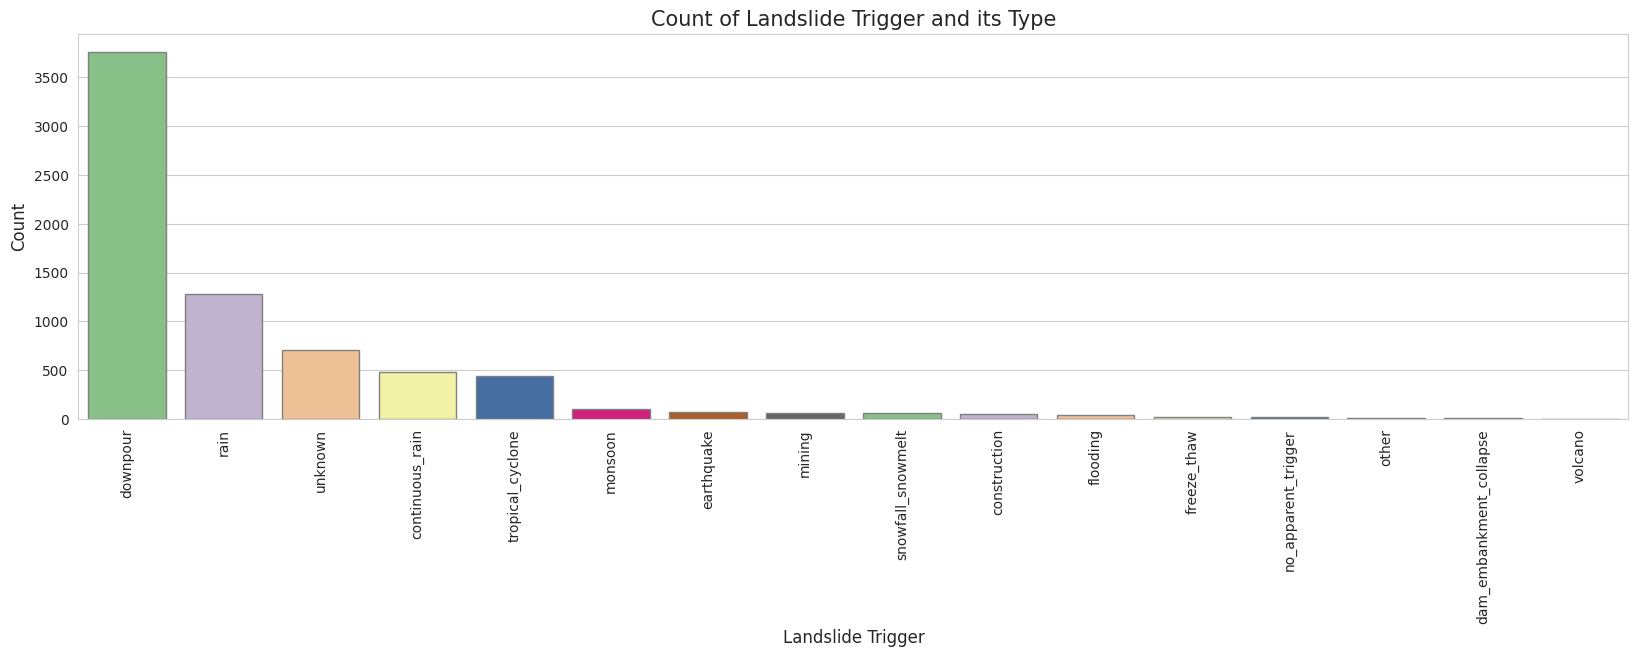

In [ ]:
plt.figure(figsize=(20,5))
temp=pd.DataFrame(gl.landslide_trigger.value_counts())
sns.barplot(x=temp.index, y=temp.landslide_trigger , palette="Accent", estimator=sum, edgecolor="grey")
plt.xticks(rotation=90)
plt.title("Count of Landslide Trigger and its Type", fontdict={"fontsize":15})
plt.xlabel("Landslide Trigger", fontdict={"fontsize":12})
plt.ylabel("Count", fontdict={"fontsize":12})
plt.show()

 above figure is bar plot using the seaborn library to visualize the count of landslide triggers and their types.

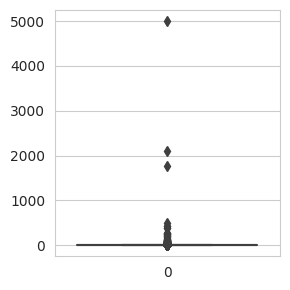

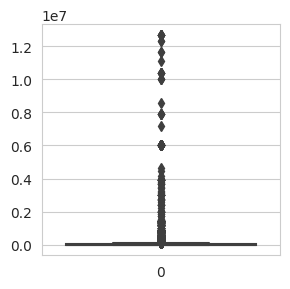

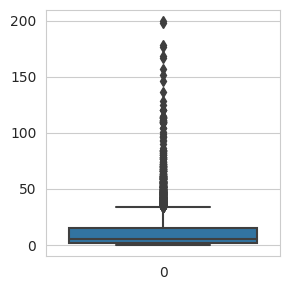

In [ ]:
col=["fatality_count","admin_division_population","gazeteer_distance"]

for i in col:
  plt.figure(figsize=(3,3))
  sns.boxplot(gl[i])
  plt.tight_layout()
  plt.show()

Counted box plot on fatality_count","admin_division_population","gazeteer_distance columns.

In [ ]:
q3=gl["admin_division_population"].quantile(0.75)
q1=gl["admin_division_population"].quantile(0.15)
q2=(q3-q1)
outlier_1=gl[~((gl["admin_division_population"]>(q3+1.5*q2)) | (gl["admin_division_population"]<(q1-1.5*q2)))]



q3=outlier_1["fatality_count"].quantile(0.85)
q1=outlier_1["fatality_count"].quantile(0.25)
q2=(q3-q1)
outlier_2=outlier_1[~((outlier_1["fatality_count"]>(q3+1.5*q2)) | (outlier_1["admin_division_population"]<(q1-1.5*q2)))]



q3=outlier_2["gazeteer_distance"].quantile(0.75)
q1=outlier_2["gazeteer_distance"].quantile(0.15)
q2=(q3-q1)
outlier_3=outlier_2[~((outlier_2["gazeteer_distance"]>(q3+1.5*q2)) | (outlier_2["gazeteer_distance"]<(q1-1.5*q2)))]

Above code calculates the quartiles (Q1 and Q3) and the interquartile range (IQR) for the column "admin_division_population" in the DataFrame gl. It then filters out the outliers based on the IQR using the 1.5 IQR rule. The same process is repeated for the columns "fatality_count" and "gazeteer_distance" to remove outliers.

In [ ]:
gl=outlier_3
print(outlier_3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5326 entries, 1 to 10019
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                5326 non-null   object 
 1   source_link                5326 non-null   object 
 2   event_date                 5326 non-null   object 
 3   event_title                5326 non-null   object 
 4   event_description          5326 non-null   object 
 5   location_description       5326 non-null   object 
 6   location_accuracy          5326 non-null   object 
 7   landslide_category         5326 non-null   object 
 8   landslide_trigger          5326 non-null   object 
 9   landslide_size             5326 non-null   object 
 10  landslide_setting          5326 non-null   object 
 11  fatality_count             5326 non-null   float64
 12  event_import_source        5326 non-null   object 
 13  country_name               5326 non-null   obje

gl = outlier_3 assigns the DataFrame outlier_3 to the variable gl, effectively replacing the original DataFrame gl with the filtered DataFrame that contains the non-outlier data.

In [ ]:
gl['date']=pd.to_datetime(gl['event_date'])
gl['month']=gl['date'].dt.month
gl['year']=gl['date'].dt.year


 above code adds new columns to the DataFrame gl based on the existing column 'event_date'. It converts the 'event_date' column to a datetime data type using the pd.to_datetime() function from pandas. Then, it extracts the month and year from the 'date' column using the dt.month and dt.year attributes, respectively, provided by the pandas Datetime accessor.

In [ ]:
fig=px.scatter_geo(gl,lat='latitude',lon='longitude', color="fatality_count" , labels="landslide_size")
fig.show()

Above code visualizes the geographical data from the DataFrame gl using latitude and longitude coordinates, and assigns colors to data points based on the 'fatality_count' column.

In [ ]:
print("Number of Landslides with No Fatality is {}".format((gl['fatality_count']==0).sum()))

Number of Landslides with No Fatality is 4110


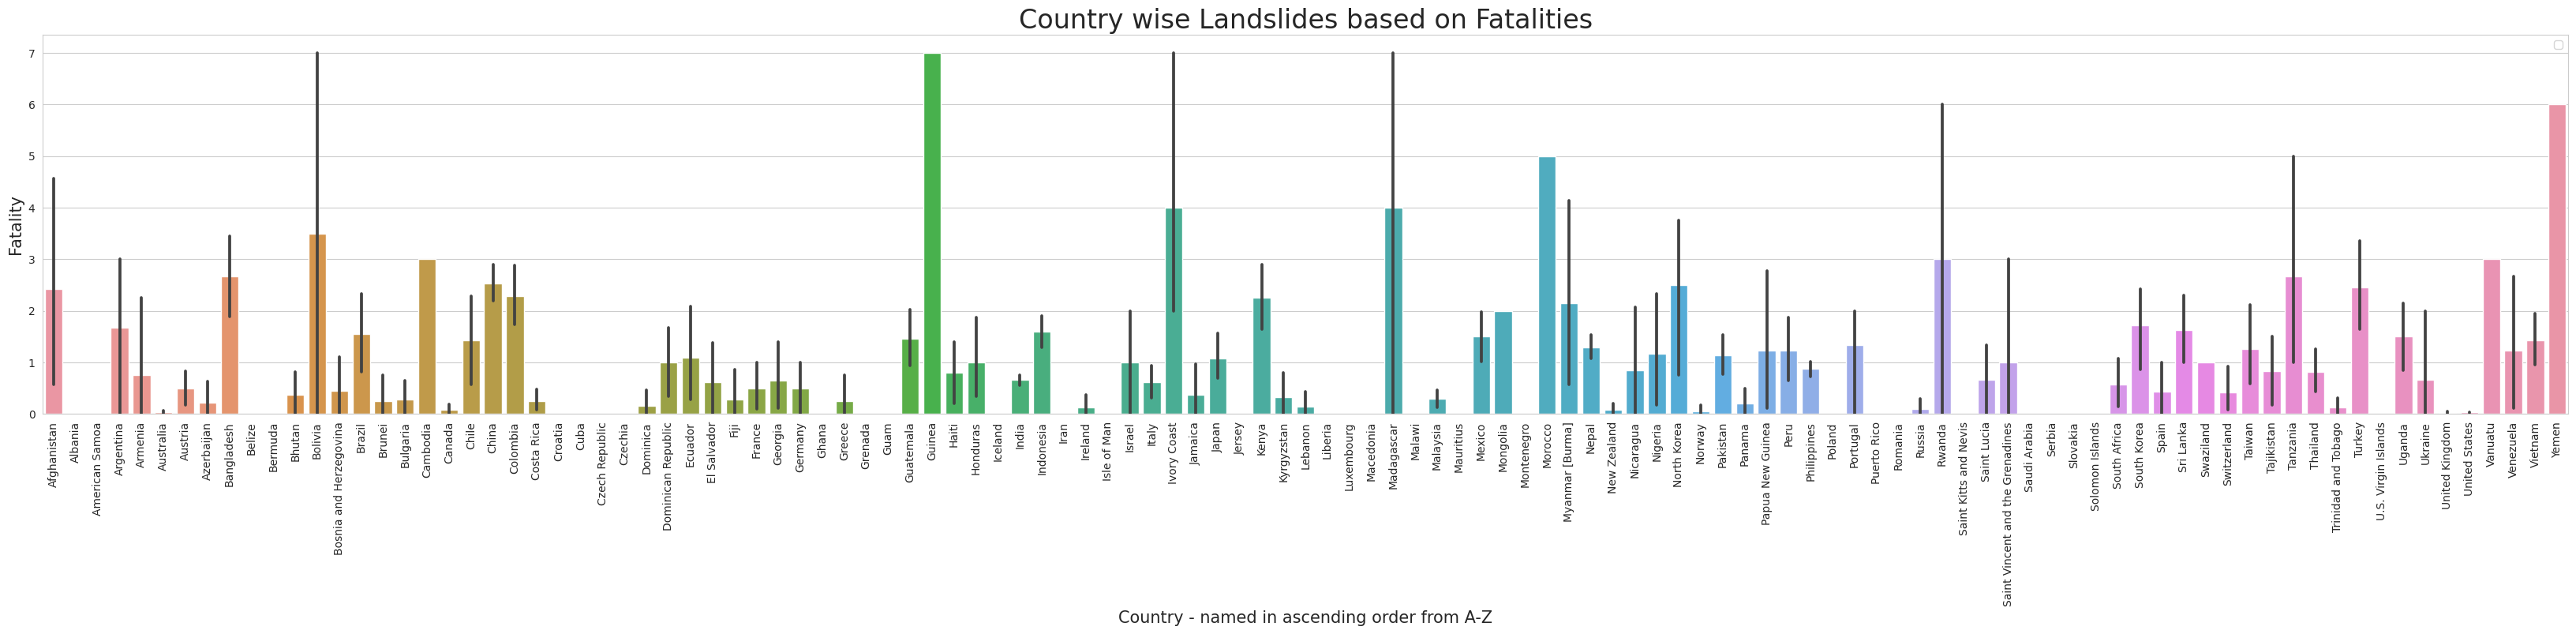

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,5,1])
sns.barplot(x=gl['country_name'].sort_values() , y=gl['fatality_count'])
plt.xticks(rotation=90)
plt.title("Country wise Landslides based on Fatalities", fontdict={"fontsize":24})
plt.xlabel("Country - named in ascending order from A-Z", fontdict={"fontsize":15})
plt.ylabel("Fatality", fontdict={"fontsize":15})
plt.legend()
plt.show()

Above figure is a box plot on country name and fatality_count columns.

In [ ]:
scale=StandardScaler()

kcol=gl[["fatality_count","admin_division_population","gazeteer_distance","longitude","latitude","month"]]
scaled_gl=scale.fit_transform(kcol)

 above cell is about to standardize the numerical columns in the DataFrame gl. The selected columns are 'fatality_count', 'admin_division_population', 'gazeteer_distance', 'longitude', 'latitude', and 'month'.

In [ ]:
# Convert the standardized array to a DataFrame
scaled_gl=pd.DataFrame(scaled_gl,index=gl.index)

In [ ]:
scaled_gl.rename(columns={0:"fatality_count",1:"admin_division_population",2:"gazeteer_distance",3:"longitude",4:"latitude",5:"month"}, inplace=True) # to check as manually renaming

In [ ]:
scaled_gl.describe()

,fatality_count,admin_division_population,gazeteer_distance,longitude,latitude,month
count,5.326000e+03,5.326000e+03,5.326000e+03,5.326000e+03,5.326000e+03,5.326000e+03
mean,-2.668204e-18,3.735486e-17,-1.440830e-16,2.834967e-17,-2.488100e-16,-6.803920e-17
std,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00
min,-4.365947e-01,-7.148243e-01,-1.020397e+00,-1.775015e+00,-3.698828e+00,-1.703421e+00
25%,-4.365947e-01,-6.323252e-01,-7.696613e-01,-9.629334e-01,-6.071083e-01,-7.886782e-01
50%,-4.365947e-01,-4.428604e-01,-3.773740e-01,1.469443e-01,2.303400e-01,1.260648e-01
75%,-4.365947e-01,2.254894e-01,5.094858e-01,9.064577e-01,6.985553e-01,7.358935e-01
max,4.280045e+00,4.008147e+00,3.250787e+00,1.773990e+00,2.360614e+00,1.650637e+00


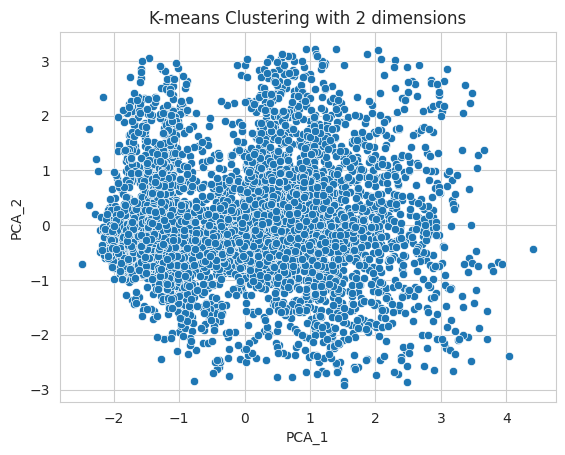

In [ ]:
pc1=PCA(n_components = 2)
pc=pc1.fit_transform(scaled_gl)
scaled_df_PCA = pd.DataFrame(pc, columns=['PCA_1','PCA_2'])

sns.scatterplot(x="PCA_1", y="PCA_2", data=scaled_df_PCA)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In the above cell it performs Principal Component Analysis (PCA) on the standardized DataFrame scaled_gl to reduce its dimensionality to two principal components. It then creates a scatter plot of the transformed data using the seaborn library.

The clusters are 2 when silhouette score is 0.4358294214174466
The clusters are 3 when silhouette score is 0.4309694546970212
The clusters are 4 when silhouette score is 0.381198367094985
The clusters are 5 when silhouette score is 0.38956980579364625
The clusters are 6 when silhouette score is 0.4055654457562673
The clusters are 7 when silhouette score is 0.3819340443568209
The clusters are 8 when silhouette score is 0.3776550551560357
The clusters are 9 when silhouette score is 0.39310099065421994


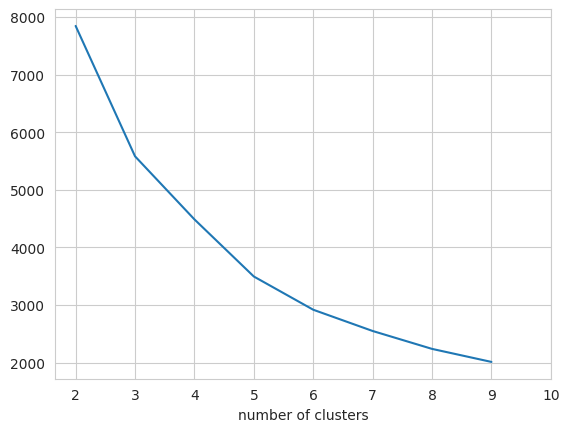

In [ ]:
temp=[]
use_range_in_clusters=np.arange(2,10)

for num_clusters in use_range_in_clusters:
    temp_kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    temp_kmeans.fit(scaled_df_PCA)
    temp.append(temp_kmeans.inertia_)
    temp_labels=temp_kmeans.labels_
    silhouette_metric=silhouette_score(scaled_df_PCA ,temp_labels )
    print("The clusters are {0} when silhouette score is {1}".format(num_clusters,silhouette_metric))


plt.plot(temp)
plt.xlabel("number of clusters")
plt.xticks(np.arange(0,9,1), np.arange(2,11,1))
plt.show()

The range of cluster numbers is defined in use_range_in_clusters, from 2 to 9. The code then iterates over each number of clusters and performs K-means clustering using temp_kmeans with the corresponding number of clusters. Finally, the code plots the inertia values against the number of clusters using plt.plot().

In [ ]:
gl['landslide_size'].unique()

array(['small', 'medium', 'unknown', 'large', 'very_large'], dtype=object)

Above code gives the unique values in the 'landslide_size' column of the DataFrame gl.

In [ ]:
gl['landslide_size'].value_counts()

medium        3609
small         1438
large          223
unknown         34
very_large      22
Name: landslide_size, dtype: int64

<Axes: >

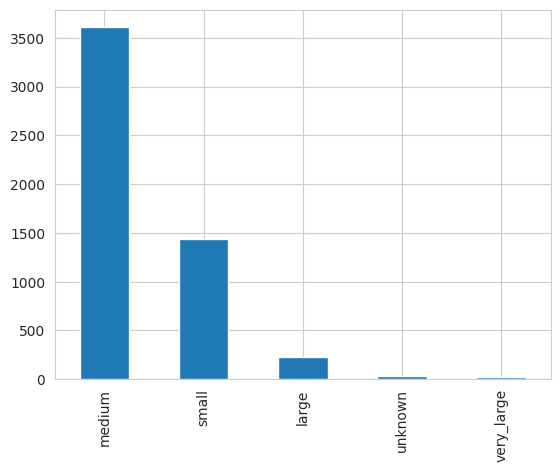

In [ ]:
gl['landslide_size'].value_counts().plot(kind='bar')

Plotted the bar plot on value_counts of 'landslide_size' column.

In [ ]:
most_frequent_value = gl['landslide_size'].mode()[0]
gl['landslide_size'].replace('unknown', most_frequent_value, inplace=True) #replaced 'unkown' values with most frequent values

In [ ]:
gl['landslide_size'].value_counts()

medium        3643
small         1438
large          223
very_large      22
Name: landslide_size, dtype: int64

Now, you can see that 'unknown values' are replaced with medium values.

<Axes: >

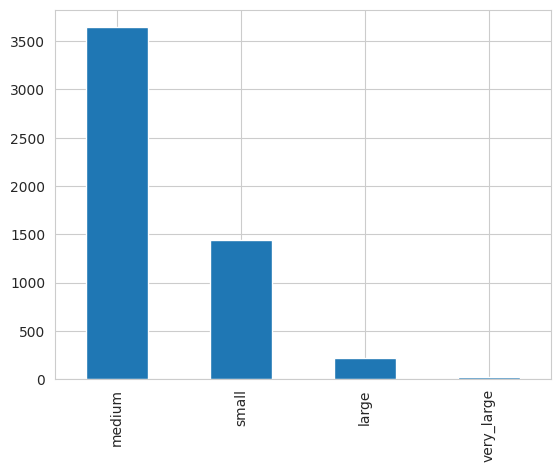

In [ ]:
gl['landslide_size'].value_counts().plot(kind='bar')

Now, you can observe the plot without 'unknown' values.

<Figure size 5000x2000 with 0 Axes>

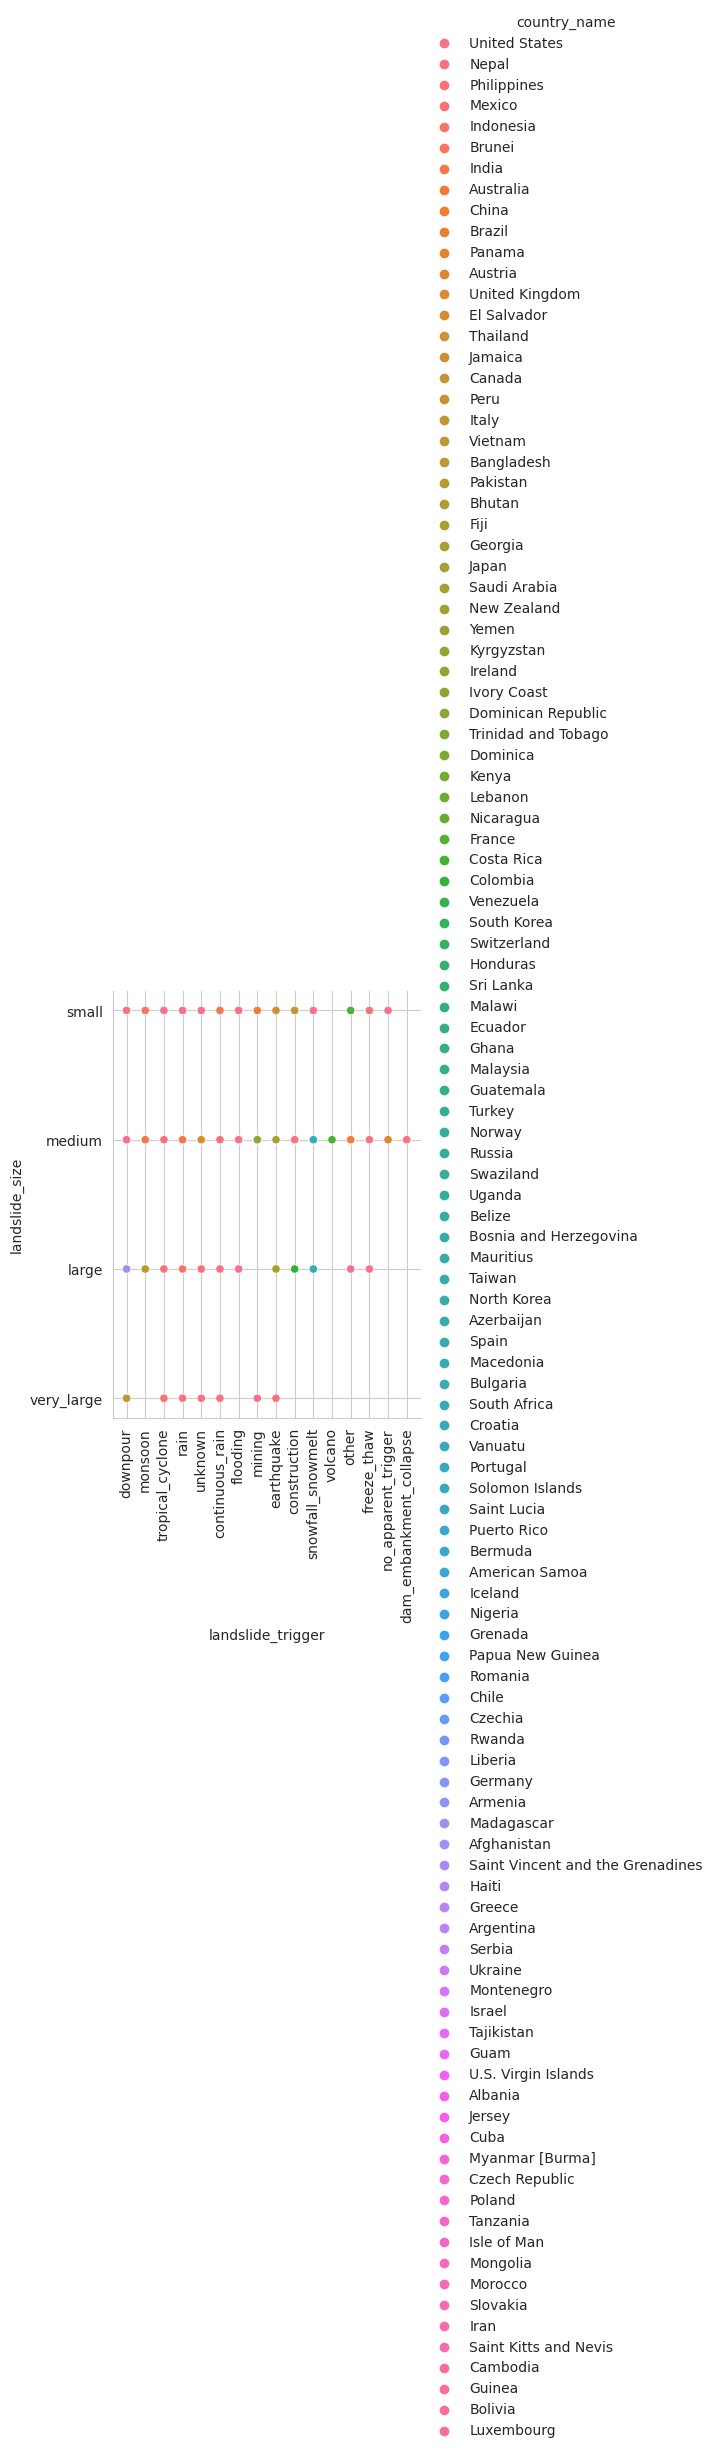

In [ ]:
plt.figure( figsize = ( 50, 20))
sns.relplot(data=gl, x="landslide_trigger", y="landslide_size",hue="country_name")
plt.xticks(rotation = 90)
plt.show()

above figure is relplot on gl dataframe with x-axis="landslide_trigger" and y-axis="landslide_size"hue="country_name"

In [ ]:
gl.columns

Index(['source_name', 'source_link', 'event_date', 'event_title',
       'event_description', 'location_description', 'location_accuracy',
       'landslide_category', 'landslide_trigger', 'landslide_size',
       'landslide_setting', 'fatality_count', 'event_import_source',
       'country_name', 'country_code', 'admin_division_name',
       'admin_division_population', 'gazeteer_closest_point',
       'gazeteer_distance', 'submitted_date', 'created_date',
       'last_edited_date', 'longitude', 'latitude', 'date', 'month', 'year'],
      dtype='object')

In [ ]:
columns_to_drop = ['date', 'month', 'year','last_edited_date','created_date','submitted_date','source_name', 'source_link', 'event_date', 'event_title',
       'event_description', 'location_description','event_import_source']
gl.drop(columns_to_drop, axis=1, inplace=True)

Removed unwanted columns from dataframe.

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = gl.select_dtypes(include=['object']).columns
L_En = LabelEncoder()
for column in categorical_columns:
  gl[column] = L_En.fit_transform(gl[column])

Label-encoded to all the columns whose datatypes are 'object'

In [ ]:
gl.sample(10)

,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,longitude,latitude
7250,1,5,3,1,10,0.0,30,96,555,9936.0,1189,0.49346,-89.7445,13.8457
5074,6,0,11,2,10,0.0,110,106,82,19653.0,1372,1.29403,-118.2286,34.2219
5291,5,5,3,1,10,2.0,80,84,86,0.0,1477,12.93346,125.6000,10.1000
1186,6,5,11,1,10,3.0,70,79,659,21867.0,2980,16.42107,83.6800,28.1100
2285,1,5,3,1,10,0.0,109,33,163,92600.0,1070,6.06254,-1.7936,53.4128
1398,6,5,14,2,2,0.0,77,81,437,9169.0,76,2.24069,-79.5391,8.9763
7559,4,5,11,1,10,0.0,70,79,157,17491.0,1133,29.71265,87.7788,27.1418
5734,8,5,11,1,10,1.0,80,84,62,4491.0,2006,4.62101,123.7851,13.6944
792,5,5,3,1,10,1.0,95,60,208,83367.0,3010,8.77663,127.5183,37.4138
7903,2,5,3,2,10,0.0,110,106,652,49138.0,1107,2.76021,-82.4662,38.4007


Used sample function to display random rows of the label-encoded dataframe.

In [ ]:
from sklearn.model_selection import train_test_split
Ip_X = gl.drop(['landslide_size'],axis=1)
Op_y = gl['landslide_size']

Imported the test train split and created input and out-put variable. Here output variable is 'landslide_size' column.

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(Ip_X,Op_y, test_size=0.2, random_state=50)

 Above code performs train-test split on the input features (Ip_X) and output labels (Op_y) using the train_test_split function from scikit-learn. It splits the data into training and testing sets, where the testing set size is 20% of the entire dataset, and the random state is set to 50 for reproducibility.

In [ ]:
sc = StandardScaler ()
train_X = sc.fit_transform(train_x) # scaling the train data
test_X= sc.transform(test_x)

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing step
    ('classifier', RandomForestClassifier())  # Model training step
])

# Fit the pipeline to the data
pipeline.fit(train_X, train_y)

# Make predictions
y_pred = pipeline.predict(test_X)

# Evaluate the model
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred, average='macro', zero_division=0)
recall = recall_score(test_y, y_pred, average='macro', zero_division=0)
f1 = f1_score(test_y, y_pred, average='macro', zero_division=0)
# roc_auc = roc_auc_score(test_y, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
# print(f'ROC-AUC score: {roc_auc}')
print('')

print('The confusion matrix is')
print('')
print(confusion_matrix(test_y, y_pred))
print('')
print('accuracy for random forest classifier is: ',accuracy*100)

Accuracy: 0.724202626641651
Precision: 0.46329478036795113
Recall: 0.35832120852867744
F1 score: 0.3647904454566252

The confusion matrix is

[[  3  46   6   0]
 [  3 625  95   0]
 [  0 136 144   0]
 [  0   7   1   0]]

accuracy for random forest classifier is:  72.42026266416511


Calculated Random Forest Classifier accuracy.

# **SVM MODEL**

In [ ]:
from sklearn.svm import SVC
steps = [
    ('preprocessing', StandardScaler()),  # Step 1: Data preprocessing (StandardScaler)
    ('svm', SVC())  # Step 2: SVM model
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(train_X, train_y)

# Make predictions on test data
y_pred = pipeline.predict(test_X)

# Evaluate the model
accuracy = pipeline.score(test_X, test_y)
print('accuracy for SVM model is :', accuracy*100)
print('')
print('The classification report :')
print(classification_report(test_y, y_pred))
print('')
print(' The confusion matrix is')
print('')
print(confusion_matrix(test_y, y_pred))
print('')
print('accuracy for SVM model is :', accuracy*100)

accuracy for SVM model is : 71.85741088180112

The classification report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.78      0.83      0.80       723
           2       0.56      0.60      0.58       280
           3       0.00      0.00      0.00         8

    accuracy                           0.72      1066
   macro avg       0.34      0.36      0.35      1066
weighted avg       0.68      0.72      0.70      1066


 The confusion matrix is

[[  0  49   6   0]
 [  0 597 126   0]
 [  0 111 169   0]
 [  0   7   1   0]]

accuracy for SVM model is : 71.85741088180112


In the above cell calculated accuracy for SVM model.

# **LOGISTTIC REGRESSION**

In [ ]:
#LOGISTTIC REGRESSION
from sklearn.linear_model import LogisticRegression
L_Reg= LogisticRegression()
L_Reg.fit(train_X, train_y)
L_Reg_y_pred = L_Reg.predict(test_X)
L_Reg_acc= accuracy_score(test_y, L_Reg_y_pred)
print("Accuracy score for a model based on  Logistic Regression is %f" % accuracy_score(test_y, L_Reg_y_pred))
print('')
print('The classification report :')
print(classification_report(test_y, L_Reg_y_pred))
print('')
print(' The confusion matrix is')
print('')
print(confusion_matrix(test_y, L_Reg_y_pred))
print('')
print('Logistic regression accuracy is: ',L_Reg_acc*100)

Accuracy score for a model based on  Logistic Regression is 0.705441

The classification report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.74      0.89      0.81       723
           2       0.56      0.38      0.45       280
           3       0.00      0.00      0.00         8

    accuracy                           0.71      1066
   macro avg       0.32      0.32      0.31      1066
weighted avg       0.65      0.71      0.67      1066


 The confusion matrix is

[[  0  50   5   0]
 [  0 646  77   0]
 [  0 174 106   0]
 [  0   7   1   0]]

Logistic regression accuracy is:  70.54409005628519


Calculated accuracy for LOGISTTIC REGRESSION  model.

# **NAIVE BAYES MODEL**

In [ ]:
#NAIVE BAYES MODEL
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_X, train_y)

y_pred = model.predict(test_X)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred, average='macro', zero_division=0)
recall = recall_score(test_y, y_pred, average='macro', zero_division=0)
f1 = f1_score(test_y, y_pred, average='macro', zero_division=0)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
print('')
print(' The confusion matrix is')
print('')
print(confusion_matrix(test_y, y_pred))
print('')
print('accuracy for Naive Bayes model is:', accuracy*100)

Accuracy: 0.6651031894934334
Precision: 0.36660771903698186
Recall: 0.36662613838443714
F1 score: 0.35254029720529767

 The confusion matrix is

[[  3  38  14   0]
 [ 14 507 194   8]
 [  0  80 199   1]
 [  0   7   1   0]]

accuracy for Naive Bayes model is: 66.51031894934334


Calculated accuracy for NAIVE BAYES MODEL.

# **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing step
    ('classifier', GradientBoostingClassifier())  # Model training step
])
pipeline.fit(train_X, train_y)
y_pred = pipeline.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred, average='macro', zero_division=0)
recall = recall_score(test_y, y_pred, average='macro', zero_division=0)
f1 = f1_score(test_y, y_pred, average='macro', zero_division=0)
#roc_auc = roc_auc_score(test_y, y_pred, average='macro')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
#print(f'ROC-AUC score: {roc_auc}')
print('')

print('The confusion matrix is')
print('')
print(confusion_matrix(test_y, y_pred))
print('')
print('Accuracy for Gradient Boosting Classifier is:', accuracy * 100)



Accuracy: 0.7138836772983115
Precision: 0.4264318937291077
Recall: 0.38304031722081516
F1 score: 0.3847371881389471

The confusion matrix is

[[  1  47   7   0]
 [  3 604 111   5]
 [  1 124 155   0]
 [  0   6   1   1]]

Accuracy for Gradient Boosting Classifier is: 71.38836772983115


Calculated accuracy for GradientBoostingClassifier.

# **XGBOOST Classifier**

In [ ]:
import xgboost as xgb
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing step
    ('classifier', xgb.XGBClassifier())  # Model training step
])
pipeline.fit(train_X, train_y)
y_pred = pipeline.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred, average='macro', zero_division=0)
recall = recall_score(test_y, y_pred, average='macro', zero_division=0)
f1 = f1_score(test_y, y_pred, average='macro', zero_division=0)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
print('')

print('The confusion matrix is')
print('')
print(confusion_matrix(test_y, y_pred))
print('')
print('Accuracy for XGBOOST Classifier is:', accuracy * 100)


Accuracy: 0.7317073170731707
Precision: 0.40836216944707515
Recall: 0.36765236837850945
F1 score: 0.37164594467366324

The confusion matrix is

[[  3  45   7   0]
 [  7 621  95   0]
 [  2 122 156   0]
 [  0   7   1   0]]

Accuracy for XGBOOST Classifier is: 73.17073170731707


Calculated accuracy for XGBOOST Classifier.


**CONCLUSION :-**  XGBOOST Classifier has the highest accuracy.